# PREDICTION OF PERCENTAGE OF A STUDENT BASED ON NUMBER OF HOURS STUDIED

# Importing relevant packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data from a URL


In [5]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Plot data points on 2D graph

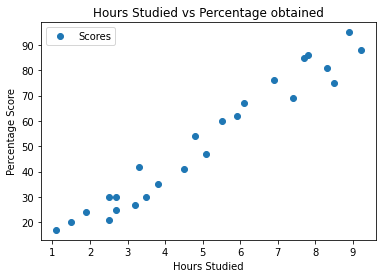

In [6]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours Studied vs Percentage obtained')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Defining Dependant and Independant Variables 

In [11]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

# Split data into training and testing data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

# Train the model

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# Plot the regression line

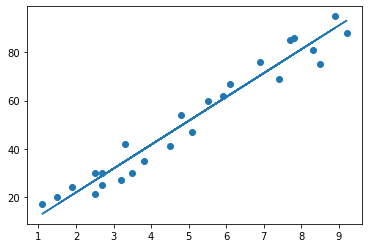

In [15]:
line = regressor.coef_*x+regressor.intercept_

plt.scatter(x, y)
plt.plot(x, line)
plt.show()

# Make predictions

In [11]:
print(X_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Predicting the scores

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Compare actual values with predicted values

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Testing with own data

In [18]:
print("Predicted Score = {}".format(regressor.predict([[9.25]])))


Predicted Score = [93.69173249]


# Value of Coefficient of the independent variable

In [19]:
regressor.coef_

array([9.91065648])

# Value of Intercept

In [20]:
regressor.intercept_

2.018160041434683

# The result of this calculation indicates on how we arrived at 93.69% for a student who studied for 9.25 hrs/day

In [21]:
9.91065648*9.25 + 2.018160041434683

93.69173248143468

# Evaluating the model

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
